## Linear Regression Samples
## by Luis Urso
## USP/ESALQ Data Science, MBA

In [4]:
## Import Required Libraries for the whole script  

import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

Sample 1 - Time x Distance

In [5]:
## Read Tempodist Dataset

df = pd.read_csv("tempodist.csv", delimiter=',')

In [6]:
## View Dataset Structure & Fields

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [7]:
## View Univariate Statistics 

df.describe()

,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


<function matplotlib.pyplot.show(close=None, block=None)>

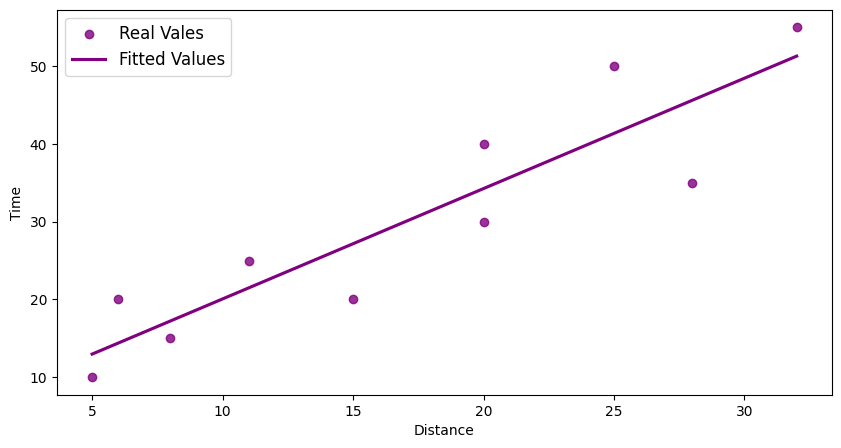

In [10]:
# Linear Regression using function 'sns.regplot'

plt.figure(figsize=(10,5))
sns.regplot(data=df, x='distancia', y='tempo', ci=False, color='purple')
plt.xlabel('Distance', fontsize=10)
plt.ylabel('Time', fontsize=10)
plt.legend(['Real Vales', 'Fitted Values'], fontsize=12)
plt.show

In [12]:
# Estimates an OLS Model

## Model Estimation (fit)

model = sm.OLS.from_formula("tempo ~ distancia", df).fit()

## Verify the estimation parameters 
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           0.000314
Time:                        18:26:18   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Save fitted values (yhat) and residuals errors (errors) into the original dataset (add columns)

df['yhat'] = modelo.fittedvalues
df['errors'] = modelo.resid
df

,tempo,distancia,yhat,errors
0,15,8,17.229730,-2.229730
1,20,6,14.391892,5.608108
2,20,15,27.162162,-7.162162
3,40,20,34.256757,5.743243
4,50,25,41.351351,8.648649
5,25,11,21.486486,3.513514
6,10,5,12.972973,-2.972973
7,55,32,51.283784,3.716216
8,35,28,45.608108,-10.608108
9,30,20,34.256757,-4.256757


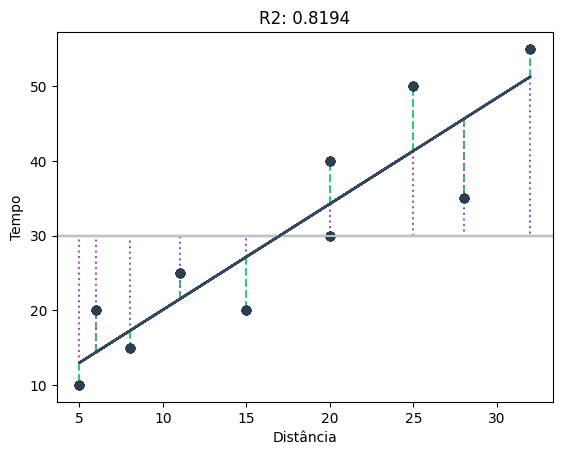

In [14]:
## Plot a Graph comparing estimation with real values, should the errors distance. 
## Helps to understand the R² concept.

y = df['tempo']
yhat = df['yhat']
x = df['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot([x[i],x[i]], [yhat[i],y[i]],'--', color='#2ecc71')
    plt.plot([x[i],x[i]], [yhat[i],mean[i]], ':', color='#9b59b6')
    plt.plot(x, y, 'o', color='#2c3e50')
    plt.axhline(y = y.mean(), color = '#bdc3c7', linestyle = '-')
    plt.plot(x,yhat, color='#34495e')
    plt.title('R2: ' + str(round(modelo.rsquared,4)))
    plt.xlabel("Distância")
    plt.ylabel("Tempo")
plt.show()

In [15]:
## Manual calculation of R²

R2 = ((df['yhat']-
       df['tempo'].mean())**2).sum()/(((df['yhat']-
                                        df['tempo'].mean())**2).sum()+
                                        (df['errors']**2).sum())

round(R2,4)



0.8194

In [16]:
## Demonstrating that the (R²) is the Pearson Correlation Squared

## Person Correlation
df[['tempo','distancia']].corr()

#R²
(df[['tempo','distancia']].corr())**2

,tempo,distancia
tempo,1.000000,0.819426
distancia,0.819426,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

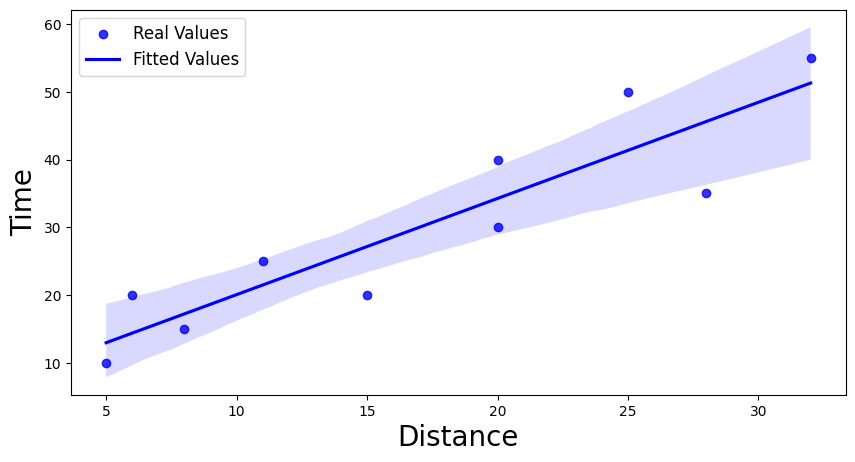

In [19]:
#Plotting the model with 95% of Confidence Interval

plt.figure(figsize=(10,5))
sns.regplot(data=df, x='distancia', y='tempo', ci=95, color='blue')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.legend(['Real Values', 'Fitted Values'], fontsize=12)
plt.show

In [20]:
## Showing the CI data at 95% 

modelo.conf_int(alpha=0.05)

,0,1
Intercept,-4.573188,16.329944
distancia,0.875861,1.961977


In [24]:
## Making a prediction

p_dist = 25
predicted = modelo.predict(pd.DataFrame({'distancia':[p_dist]}))

print("The time to make",p_dist,"is",predicted[0])

The time to make 25 is 41.351351351351354
